<a href="https://colab.research.google.com/github/Elizabeth-George-M/Lab7/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz,plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [2]:
data = pd.read_csv('/content/employee_data (1) 2 - employee_data (1) 2.csv')

In [13]:
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation          0
n_projects               0
recently_promoted    13949
salary                   0
satisfaction             0
status                   0
tenure                   0
dtype: int64

In [17]:
def num(data):
   num_var = []
   for col in data.columns:
    if data[col].dtype == "float64":
      num_var.append(col)
   return num_var


nv = num(data)


for col in nv:
  mean = data[col].mean()
  data[col].fillna(mean, inplace=True)

data.isnull().sum()

avg_monthly_hrs        0
department           709
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction           0
status                 0
tenure                 0
dtype: int64

In [18]:
data.dropna(subset=['department'],inplace=True)

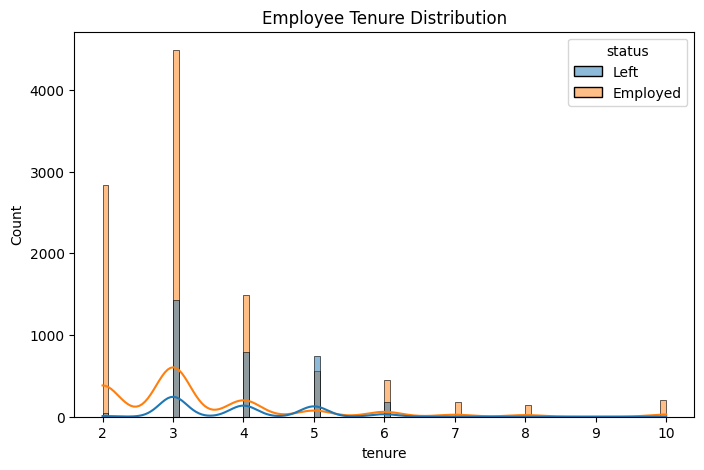

In [19]:
# Histogram for tenure
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='tenure', hue='status', kde=True)
plt.title("Employee Tenure Distribution")
plt.show()

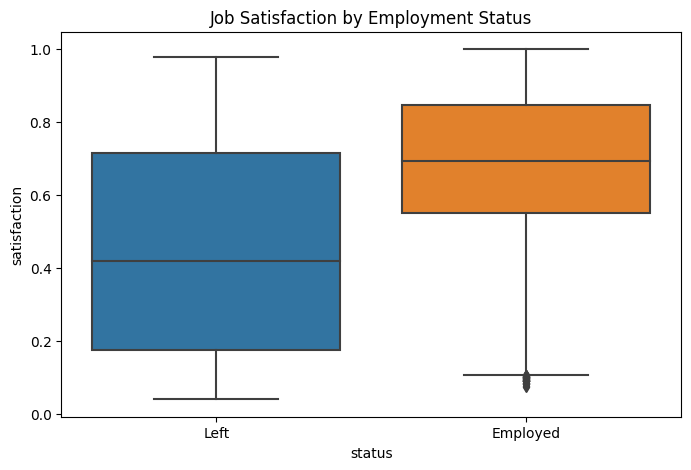

In [20]:
# Boxplot for job satisfaction
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='status', y='satisfaction')
plt.title("Job Satisfaction by Employment Status")
plt.show()

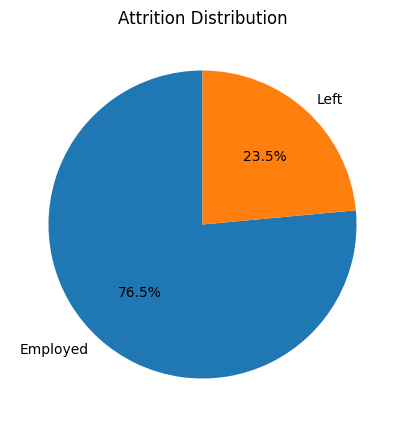

In [21]:
# Pie chart for attrition distribution
attrition_counts = data['status'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Attrition Distribution")
plt.show()

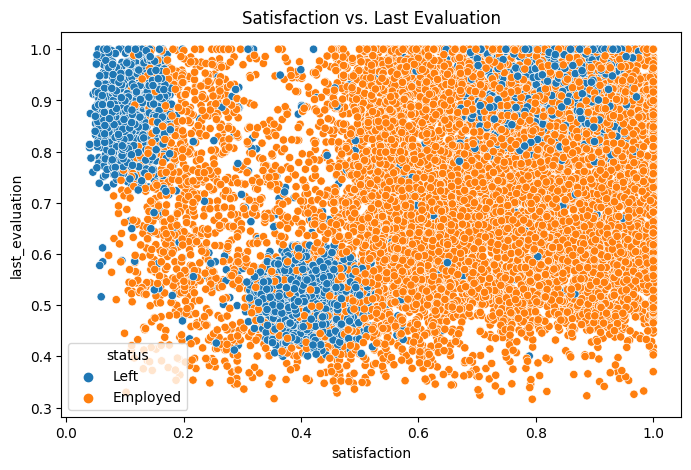

In [6]:
# Scatter plot for satisfaction vs. last evaluation
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='satisfaction', y='last_evaluation', hue='status')
plt.title("Satisfaction vs. Last Evaluation")
plt.show()

In [22]:
# 2. Decision Tree Modeling

# Split the dataset into a training set and a testing set
X = data[['tenure', 'satisfaction', 'n_projects']]
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
data['last_evaluation'].fillna(data['last_evaluation'].median(), inplace=True)
data['satisfaction'].fillna(data['satisfaction'].mean(), inplace=True)
data['tenure'].fillna(data['tenure'].median(), inplace=True)

In [24]:
# Build a decision tree classifier using Gini impurity
tree_gini = DecisionTreeClassifier(criterion='gini')
tree_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
# Visualize the decision tree
import graphviz
dot_data = export_graphviz(tree_gini, out_file=None, feature_names=X.columns, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("employee_attrition_gini_tree")


'employee_attrition_gini_tree.pdf'

In [27]:
# 3. Model Evaluation

# Make predictions
y_pred_gini = tree_gini.predict(X_test)

# Evaluate the model
accuracy_gini = accuracy_score(y_test, y_pred_gini)
precision_gini = precision_score

In [28]:
accuracy_gini

0.9283604135893648

In [30]:
precision_gini

<function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

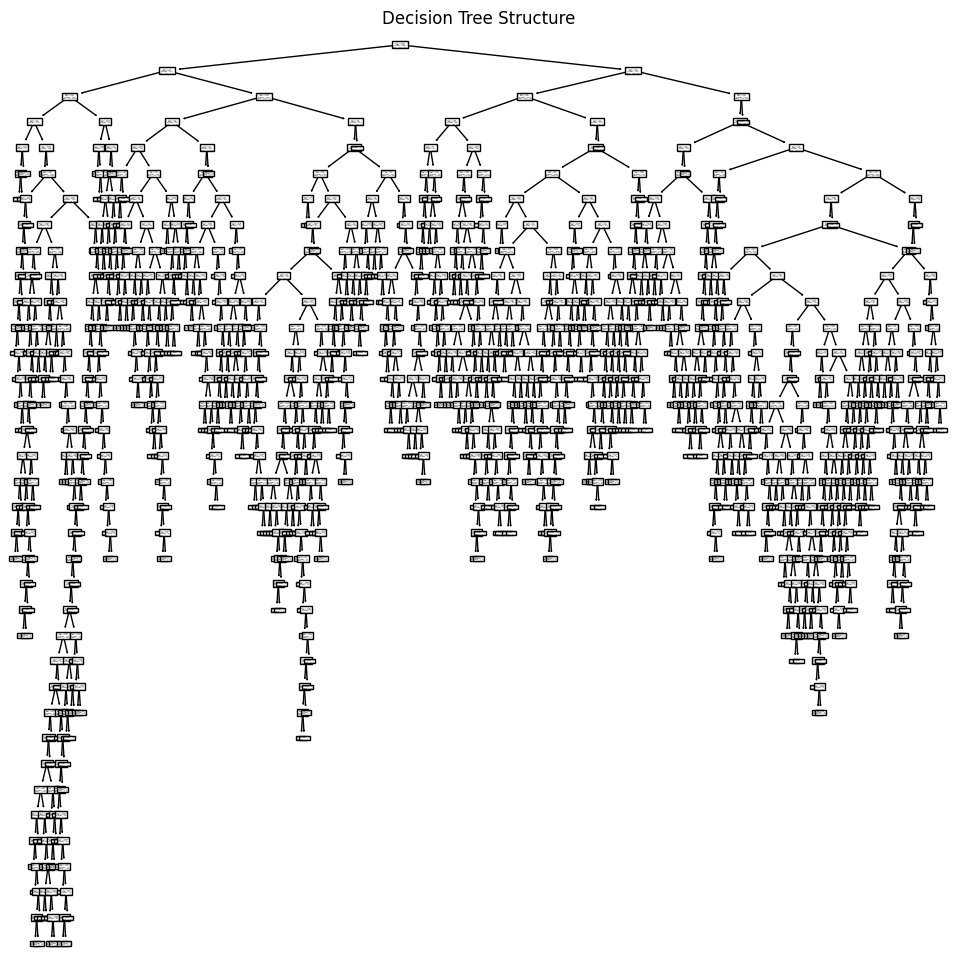

Tree depth: 35
Most influential features: [0.585908888669287, 0.22716230741916066, 0.18692880391155234]


In [54]:
# export_graphviz(tree_gini, out_file='tree.dot')
# with open('tree.dot') as f:
#     dot_graph = f.read()
# png_bytes = tree.export_graphviz(tree_gini, out_file=None)

# Display the PNG image
plt.figure(figsize=(12, 12))
plot_tree(tree_gini)
plt.axis('off')
plt.title('Decision Tree Structure')
plt.show()

# Get the depth of the tree
tree_depth = tree_gini.tree_.max_depth

# Print the depth of the tree
print('Tree depth:', tree_depth)

# Get the feature importances
feature_importances = tree_gini.feature_importances_

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importances, reverse=True)

# Get the top 10 most influential features
most_influential_features = sorted_feature_importances[:10]

# Print the top 10 most influential features
print('Most influential features:', most_influential_features)


In [55]:
# Create and fit a decision tree classifier (Entropy criterion)
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1)
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [58]:
features = ['tenure', 'satisfaction', 'n_projects']

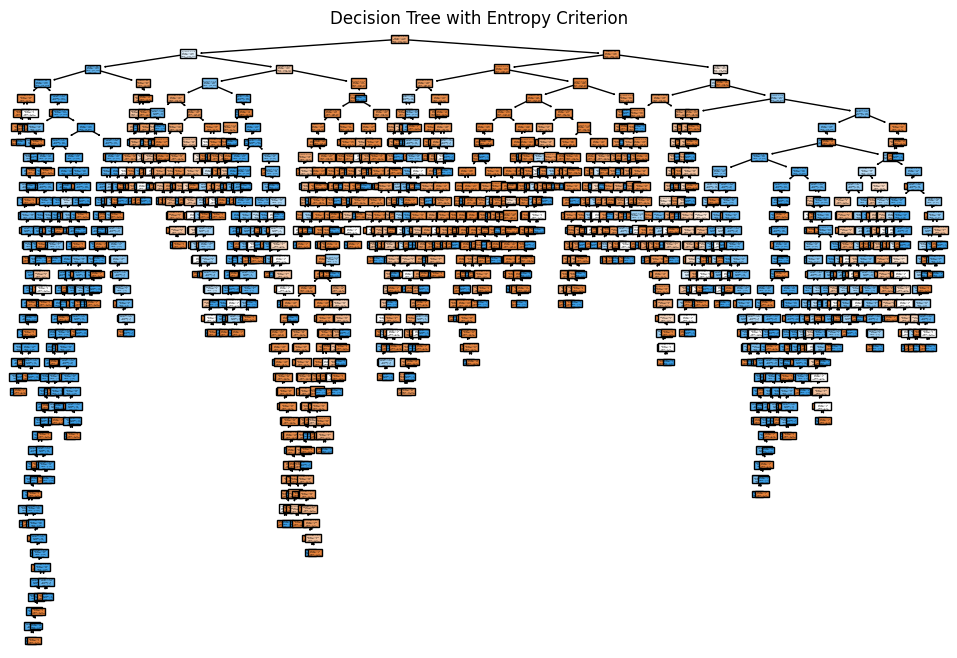

Accuracy (Entropy): 0.93


In [59]:
# Plot the decision tree (Entropy criterion)
plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, filled=True, feature_names=features, class_names=['Employed', 'Left'])
plt.title("Decision Tree with Entropy Criterion")
plt.show()

# Evaluate the model on the test set
accuracy_entropy = clf_entropy.score(X_test, y_test)
print(f"Accuracy (Entropy): {accuracy_entropy:.2f}")

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred_gini = tree_gini.predict(X_test)

# Predictions using the pruned Entropy criterion decision tree model
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluation metrics for Gini criterion model
accuracy_gini = accuracy_score(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini, pos_label='Left')
recall_gini = recall_score(y_test, y_pred_gini, pos_label='Left')
f1_score_gini = f1_score(y_test, y_pred_gini, pos_label='Left')

# Evaluation metrics for Entropy criterion model
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy, pos_label='Left')
recall_entropy = recall_score(y_test, y_pred_entropy, pos_label='Left')
f1_score_entropy = f1_score(y_test, y_pred_entropy, pos_label='Left')



In [63]:
# Confusion matrices for both models
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini, labels=['Employed', 'Left'])
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy, labels=['Employed', 'Left'])


In [64]:
# Create a diverging bar chart to display confusion matrices
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(10, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    classes = ['Employed', 'Left']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

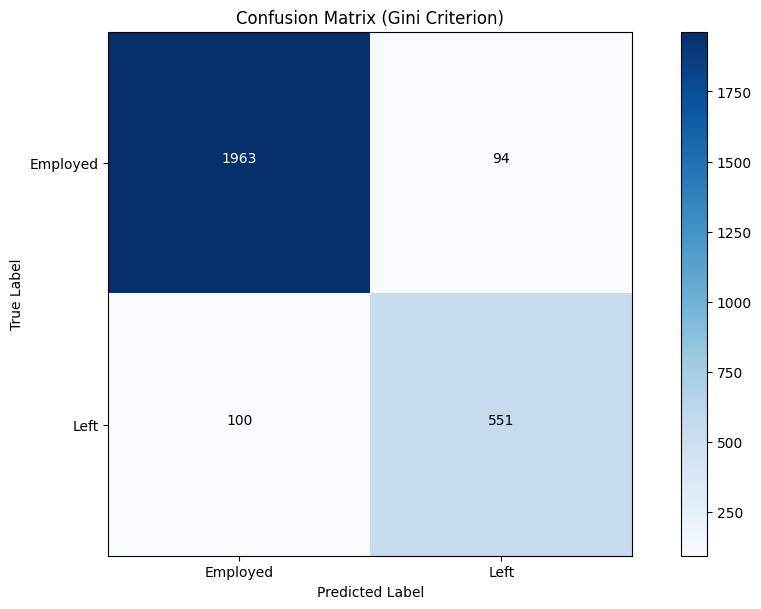

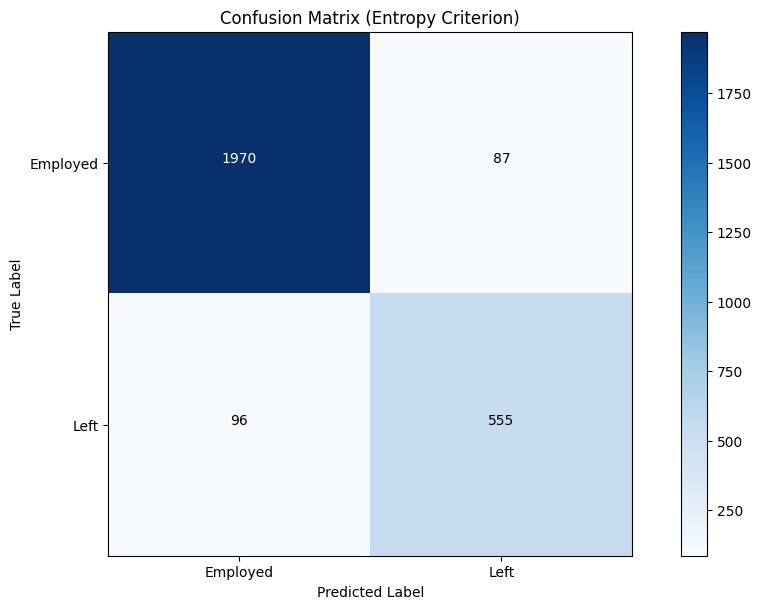

Metrics for Gini Criterion Model:
Accuracy: 0.93
Precision: 0.85
Recall: 0.85
F1-Score: 0.85

Metrics for Entropy Criterion Model:
Accuracy: 0.93
Precision: 0.86
Recall: 0.85
F1-Score: 0.86


In [65]:
import itertools
import numpy as np
plot_confusion_matrix(conf_matrix_gini, 'Confusion Matrix (Gini Criterion)')
plt.show()

plot_confusion_matrix(conf_matrix_entropy, 'Confusion Matrix (Entropy Criterion)')
plt.show()

# Print evaluation metrics
print("Metrics for Gini Criterion Model:")
print(f"Accuracy: {accuracy_gini:.2f}")
print(f"Precision: {precision_gini:.2f}")
print(f"Recall: {recall_gini:.2f}")
print(f"F1-Score: {f1_score_gini:.2f}\n")

print("Metrics for Entropy Criterion Model:")
print(f"Accuracy: {accuracy_entropy:.2f}")
print(f"Precision: {precision_entropy:.2f}")
print(f"Recall: {recall_entropy:.2f}")
print(f"F1-Score: {f1_score_entropy:.2f}")

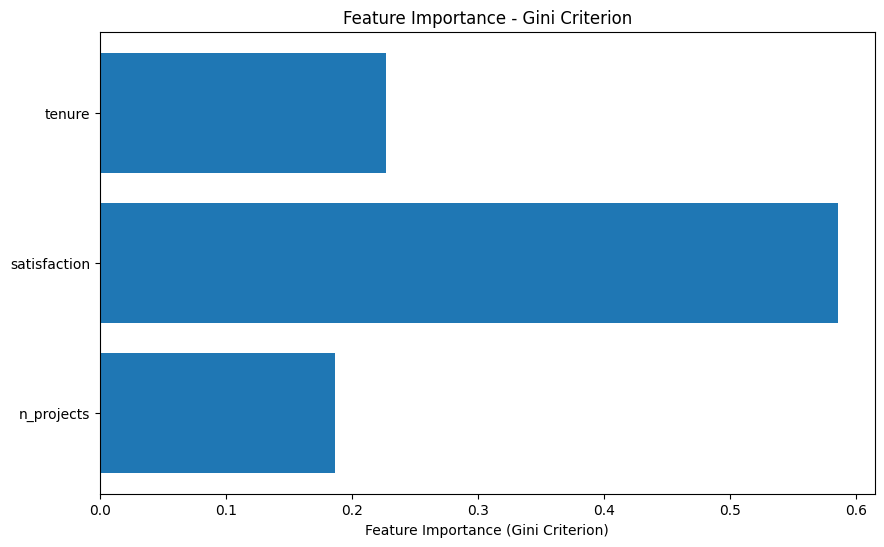

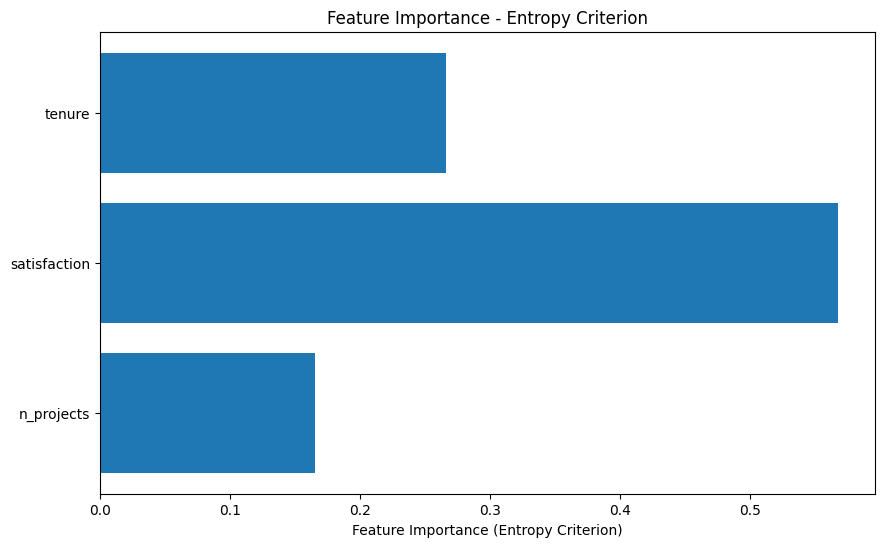

In [68]:
# Get feature importances for Gini criterion model
feature_importance_gini = tree_gini.feature_importances_

# Get feature importances for Entropy criterion model
feature_importance_entropy = clf_entropy.feature_importances_

# List of feature names
feature_names = ['tenure', 'satisfaction', 'n_projects']

# Create a bar chart for Gini criterion
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_gini)
plt.xlabel('Feature Importance (Gini Criterion)')
plt.title('Feature Importance - Gini Criterion')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

# Create a bar chart for Entropy criterion
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_entropy)
plt.xlabel('Feature Importance (Entropy Criterion)')
plt.title('Feature Importance - Entropy Criterion')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()